# The Numpy Random Package

[Official documentation](https://numpy.org/doc/stable/reference/random/index.html)

***

In [2]:
# Numpy is for efficient numerical arrays
import numpy as np
# Matplotlib is for plotting
import matplotlib.pyplot as plt

In [3]:
# Put any configuration under the imports

# Change the default figure size:
plt.rcParams['figure.figsize'] = [12, 6]

# Change the default style sheet:
plt.style.use('ggplot')

## numpy.random.normal

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

***

In [4]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

In [5]:
# Only look at the first ten items from the s array
s[:10]

array([-0.03231344, -0.1050522 ,  0.07054768, -0.07671603, -0.13490236,
       -0.09171836, -0.03916256,  0.00954624, -0.18363919,  0.09575635])

In [6]:
abs(mu - np.mean(s))

0.004210454048523987

In [7]:
abs(sigma - np.std(s, ddof=1))

0.0016222456753099829

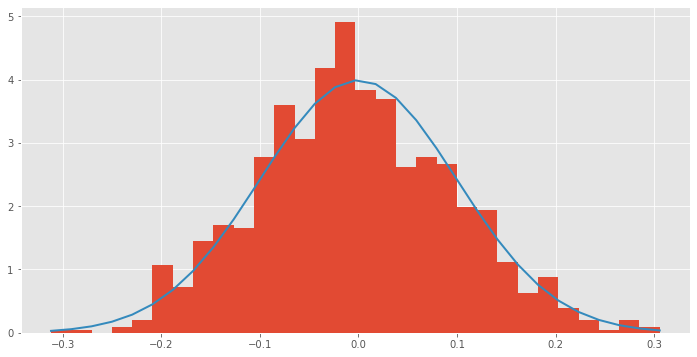

In [8]:
count, bins, ignored = plt.hist(s, 30, density=True)
f = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2/(2 * sigma**2))
plt.plot(bins,f,linewidth=2)
plt.show()

# Although the initial code specified a colour, it's better
# to let the style guide pick the colours for your plots

<br>

## Rolling dice

***

Roll a single dice.

https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html

In [9]:
# Pick a random integer between X (inclusive) and Y (exclusive)
np.random.randint(2, 10)

# This should give me 10 random numbers
# Because high wasn't specified, 2 is treated as the highest number
# It's one above the highest number, so starting at 0 all the way up to but not including 2
# The size refers to the size of the array, i.e. 10 numbers
# If you specify a second number and continue running the code, you'll start getting random numbers

7

Roll several dice.

In [10]:
# Making the number of rolls a variable
runs = 10000

In [11]:
# Pick many random integers between 1 (inclusive) and 7 (exclusive)
dice = np.random. randint (1, 7, runs)

In [12]:
# See the values
dice

array([1, 6, 2, ..., 3, 6, 4])

<br>

Plotting the numbers on a bar chart.

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html

Plot the dice rolls

(Using numpy.unique to calculate the width as pyplot can't calculate this)

https://numpy.org/doc/stable/reference/generated/numpy.unique.html

In [13]:
# Count the number of times each face appears 
faces, counts = np.unique(dice, return_counts=True)
faces, counts
# It returns the unique values and a second array that gives you the number of times each unique value occurred

(array([1, 2, 3, 4, 5, 6]),
 array([1702, 1645, 1655, 1632, 1647, 1719], dtype=int64))

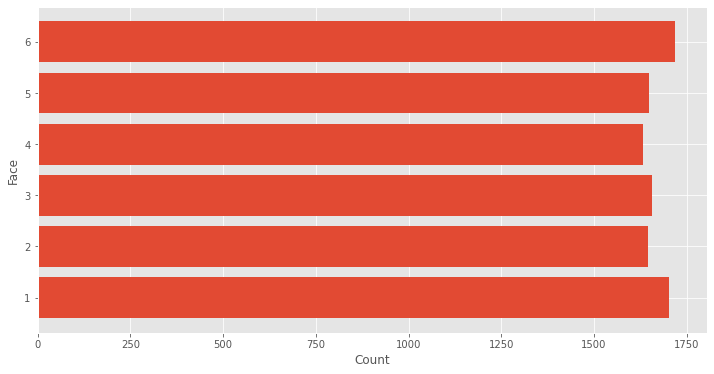

In [14]:
# randint should be picking each number 1/6th of the time
# If we plot the count of each number on a bar chart, we should be able to see that the six bars are all the same height
# The width relates to the number of times each of the numbers appears in the above list.

# Create a new plot using fig and ax
fig, ax = plt.subplots()
# Bar chart
ax.barh(faces, counts)
# Set axis labels
ax.set_ylabel('Face')
ax.set_xlabel('Count');

<br>

## Roll more than one dice

***

In [15]:
# The number of dice to roll in each turn
nodice = 2
# The number of turns
noturns = 10000
# Roll the dice
dice = np.random. randint (1, 7, (noturns, nodice))
# Passing a tuple at the end of the dice variable (like a list with square brackets)
# This is 10000 rolls (noturns) of 2 dice (nodice)
# There's 10000 things in the list overall but each of those things is a list containing 2 things
# Those '2 things' are random integers between 1 and 6 independently selected
# Have a look
dice

array([[1, 4],
       [5, 3],
       [5, 1],
       ...,
       [5, 2],
       [2, 2],
       [4, 4]])

In [17]:
# Sum the faces of the dice together
# Go into each of the 2 value lists and add the values together
# axis=1 means don't just add everything together, add everything on the second axis together which is the number of dice
# if you say axis=0 that will add the columns together
totals = np.sum(dice, axis=1)
totals

array([5, 8, 6, ..., 7, 4, 8])

In [18]:
# Now you can plot the values
# Count the number of times each face appears
faces, counts = np.unique(totals, return_counts=True)
faces, counts

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 247,  561,  827, 1068, 1381, 1644, 1392, 1110,  881,  602,  287],
       dtype=int64))

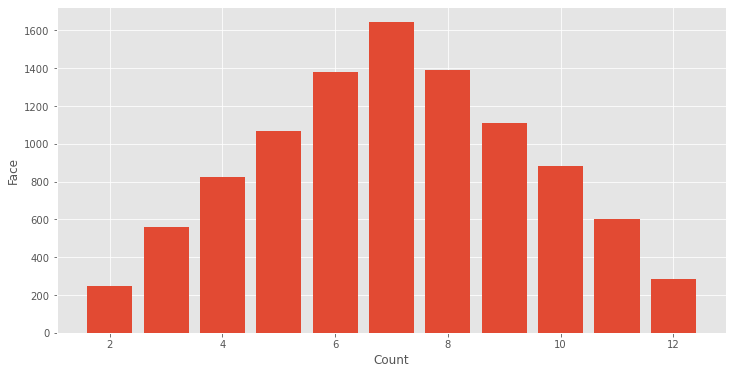

In [19]:
# Create a new plot using fig and ax
fig, ax = plt.subplots()
# Plot a vertical bar chart
ax.bar(faces, counts)
# Set axis labels
ax.set_ylabel('Face')
ax.set_xlabel('Count');

# If you roll 2 dice and sum the faces of them, you're more likely to get a 7 than a 6 or an 8
# Can we come up for a reason for why that might be?
# It depends on the likelihood of the numbers when rolling the dice
# For example, there's multiple ways of getting some numbers (e.g. 7) than others (e.g. 2)

<br>

## Lots of dice

***

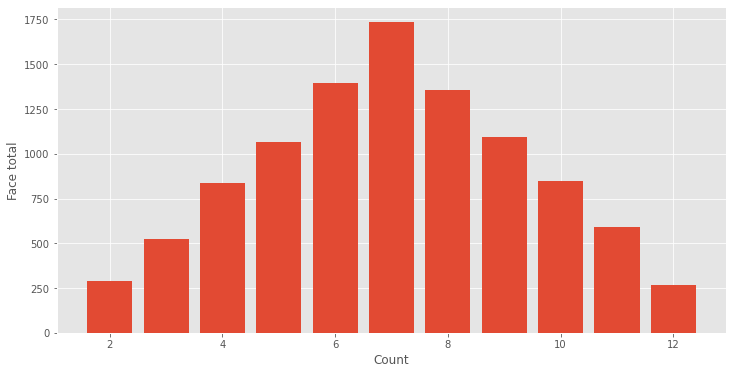

In [21]:
# The number of dice to roll in each turn
nodice = 2
# The number of turns
noturns = 10000
# Roll the dice
dice = np.random. randint (1, 7, (noturns, nodice))
# Passing a tuple at the end of the dice variable (like a list with square brackets)
# This is 10000 rolls (noturns) of 2 dice (nodice)
# There's 10000 things in the list overall but each of those things is a list containing 2 things
# Those '2 things' are random integers between 1 and 6 independently selected
# Sum the faces of the dice together
# Go into each of the 2 value lists and add the values together
# axis=1 means don't just add everything together, add everything on the second axis together which is the number of dice
# if you say axis=0 that will add the columns together
totals = np.sum(dice, axis=1)
# Count the number of times each face appears
faces, counts = np.unique(totals, return_counts=True)
# Create a new plot using fig and ax
fig, ax = plt.subplots()
# Plot a vertical bar chart
ax.bar(faces, counts)
# Set axis labels
ax.set_ylabel('Face total')
ax.set_xlabel('Count');

# If you roll more dice, you are getting a central tendency when you roll the dice
# Even when you're talking about random numbers (e.g. rolling a dice), everyone expects an equal chance for everything
# However, in the real world, there's a normal distribution (see numpy.random.normal above)
# This phenomenon is much more common than the equal chances of everything
# The spread out from the mean refers to the sigma above
# Even when we start out with something that has equal probabilities, when we run it again and again we start combining different random values together we start heading
# in this direction of a central number that is much more likely and as you move away from that number in either direction things become unlikely
# Again, this is linked to the likelihood of getting certain numbers (e.g. 3) instead of 1

## References
***

[1] https://www.w3schools.com/python/numpy/numpy_random.asp

[2] https://www.datacamp.com/community/tutorials/numpy-random

***

## End